In [1]:
import pandas as pd #Manejo análisis y estructuras de datos
import numpy as np #cálculo numérico y de análisis de datos
import seaborn as sns #creación de gráficos estadisticos
import matplotlib.pyplot as plt # creación de gráficos en dos dimensiones

#Librerías para implementar modelos de ciencia de datos
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
datos = pd.read_csv('./Car_details.csv')

In [60]:
#Analisis Exploratorio
#Se realiza lectuca de datos
datos.head (50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
datos.describe ()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificación de datos faltantes Year')

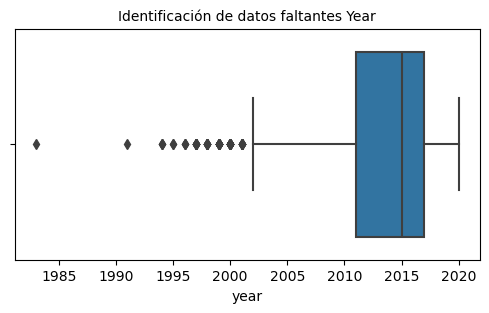

In [61]:
#Identificación de datos faltantes y atípicos 1. - Limpiar la base de datos y tratando valores faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['year'])
plt.title ('Identificación de datos faltantes Year', fontsize = 10)

Cantidad de datos faltantes en 'year': 0


C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


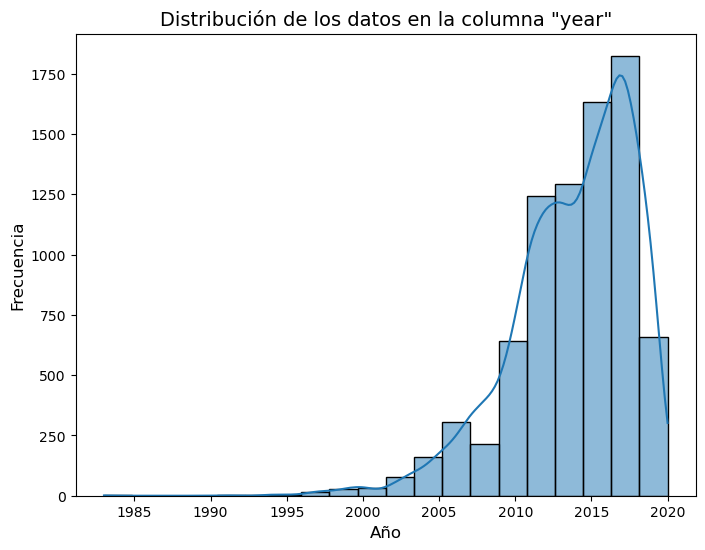

In [6]:
missing_values = datos['year'].isnull().sum()
print("Cantidad de datos faltantes en 'year':", missing_values)

# Visualizar un histograma de la columna 'year' para identificar valores atípicos
plt.figure(figsize=(8, 6))
sns.histplot(datos['year'], bins=20, kde=True)
plt.title('Distribución de los datos en la columna "year"', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Identificación de datos faltantes - Selling Price')

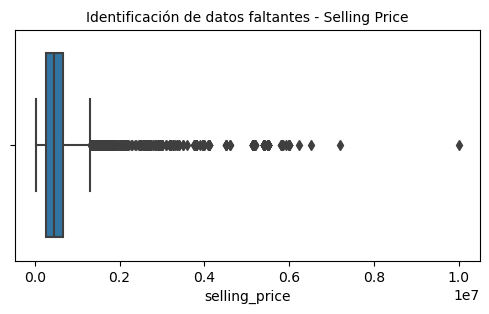

In [7]:
#Identificación de datos faltantes y atípicos 2.

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['selling_price'])
plt.title ('Identificación de datos faltantes - Selling Price', fontsize = 10)

Cantidad de datos faltantes en 'selling_price': 0


C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


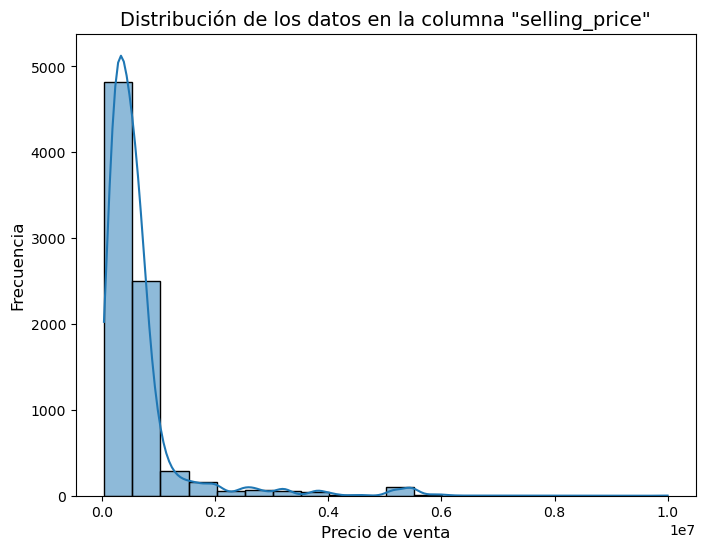

In [8]:
# Verificar la cantidad de datos faltantes en 'selling_price'
missing_values = datos['selling_price'].isnull().sum()
print("Cantidad de datos faltantes en 'selling_price':", missing_values)

# Visualizar un histograma de la columna 'selling_price' para identificar valores atípicos
plt.figure(figsize=(8, 6))
sns.histplot(datos['selling_price'], bins=20, kde=True)
plt.title('Distribución de los datos en la columna "selling_price"', fontsize=14)
plt.xlabel('Precio de venta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

In [9]:
# Revision de datos faltantes

print ("Cantidad de Registros con cero en selling_price:" , datos['selling_price'].isin([0]).sum())
print ("Cantidad de Registros con cero en km_driven:" , datos['km_driven'].isin([0]).sum())
print ("Cantidad de Registros con cero en seats:" , datos['seats'].isin([0]).sum())

Cantidad de Registros con cero en selling_price: 0
Cantidad de Registros con cero en km_driven: 0
Cantidad de Registros con cero en seats: 0


Text(0.5, 1.0, 'Identificación de datos atípicos - year')

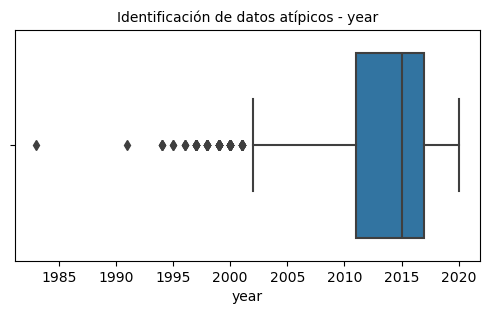

In [10]:
#Identificación de datos atípicos 1.

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['year'])
plt.title ('Identificación de datos atípicos - year', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos faltantes - Selling Price')

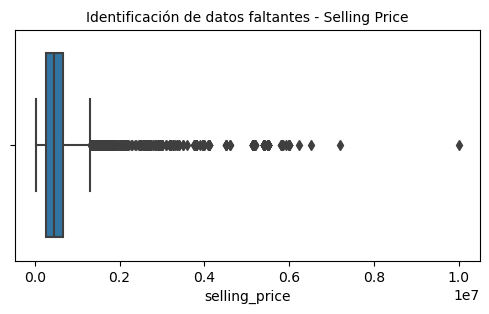

In [11]:
#Identificación de datos faltantes y atípicos 2.

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['selling_price'])
plt.title ('Identificación de datos faltantes - Selling Price', fontsize = 10)

In [12]:
# Revision de datos faltantes

print ("Cantidad de Registros con cero en selling_price:" , datos['selling_price'].isin([0]).sum())
print ("Cantidad de Registros con cero en km_driven:" , datos['km_driven'].isin([0]).sum())
print ("Cantidad de Registros con cero en seats:" , datos['seats'].isin([0]).sum())

Cantidad de Registros con cero en selling_price: 0
Cantidad de Registros con cero en km_driven: 0
Cantidad de Registros con cero en seats: 0


Text(0.5, 1.0, 'Identificación de datos atípicos - km_driven')

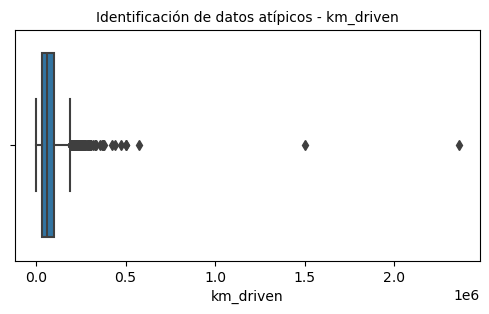

In [13]:
#Identificación de datos atípicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['km_driven'])
plt.title ('Identificación de datos atípicos - km_driven', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos atípicos - seats')

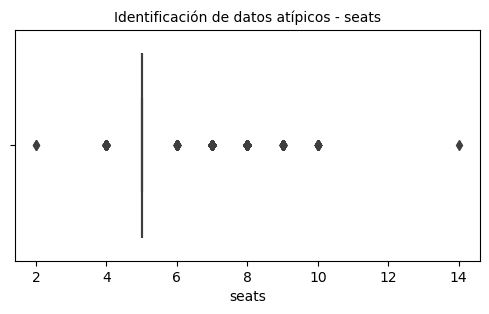

In [14]:
#Identificación de datos atípicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['seats'])
plt.title ('Identificación de datos atípicos - seats', fontsize = 10)

In [15]:
# Calcula el total de datos atípicos
nivel_minimo = 1985
nivel_maximo = 2024
total_atipicos = ((datos['year'] < nivel_minimo) | (datos['year'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))

# Reemplaza los valores atípicos por la moda
moda_year = datos['year'].mode()[0]  # Calcula la moda de la columna 'year'
datos.loc[(datos['year'] < nivel_minimo) | (datos['year'] > nivel_maximo), 'year'] = moda_year

# Verifica que se hayan reemplazado los valores atípicos
total_atipicos_despues = ((datos['year'] < nivel_minimo) | (datos['year'] > nivel_maximo)).sum()
print("Después de reemplazar, el total de datos atípicos es {}".format(total_atipicos_despues))

El total de datos atípicos es 1
Después de reemplazar, el total de datos atípicos es 0


In [16]:
# Calcula el total de datos atípicos
nivel_minimo = 2
nivel_maximo = 10
total_atipicos = ((datos['seats'] < nivel_minimo) | (datos['seats'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))

# Reemplaza los valores atípicos por la moda
moda_seats = datos['seats'].mode()[0]  # Calcula la moda de la columna 'seats'
datos.loc[(datos['seats'] < nivel_minimo) | (datos['seats'] > nivel_maximo), 'seats'] = moda_seats

# Verifica que se hayan reemplazado los valores atípicos
total_atipicos_despues = ((datos['seats'] < nivel_minimo) | (datos['seats'] > nivel_maximo)).sum()
print("Después de reemplazar, el total de datos atípicos es {}".format(total_atipicos_despues))

El total de datos atípicos es 1
Después de reemplazar, el total de datos atípicos es 0


In [17]:
#filtro de datos atípicos

datos=datos [(datos['year']<nivel_maximo)&(datos['year']>nivel_minimo)]

In [18]:
#validar si se removieron los datos atípicos


total_atipicos=((datos ['year'] < nivel_minimo)|(datos['year']> nivel_maximo)).sum()
print ("el total de datos atípicos es {}".format(total_atipicos))

el total de datos atípicos es 0


In [19]:
total_atipicos=((datos ['seats'] < nivel_minimo)|(datos['seats']> nivel_maximo)).sum()
print ("el total de datos atípicos es {}".format(total_atipicos))

el total de datos atípicos es 0


In [20]:
datos = pd.read_csv('./Car_details.csv')

In [21]:
#Revisión del tipo de dato y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [62]:
#Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

conteo_combustible = datos['fuel'].value_counts()
print(conteo_combustible)

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


In [23]:
conteo_combustible = datos['seller_type'].value_counts()
print(conteo_combustible)

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64


In [24]:
conteo_combustible = datos['transmission'].value_counts()
print(conteo_combustible)

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


In [25]:
conteo_combustible = datos['owner'].value_counts()
print(conteo_combustible)

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


In [26]:
datos[['selling_price']].head(40)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [63]:
#Dividir el dataset en Train y Test para evaluar correctamente el modelo
# Seleccionar solo las columnas numéricas del DataFrame
datos_numericos = datos.select_dtypes(include=['number'])

# Calcular la matriz de correlación entre las variables numéricas
correlacion = datos_numericos.corr()

# Mostrar la matriz de correlación
print(correlacion)

                   year  selling_price  km_driven     seats
year           1.000000       0.414092  -0.418006 -0.009144
selling_price  0.414092       1.000000  -0.225534  0.041358
km_driven     -0.418006      -0.225534   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000


<Axes: >

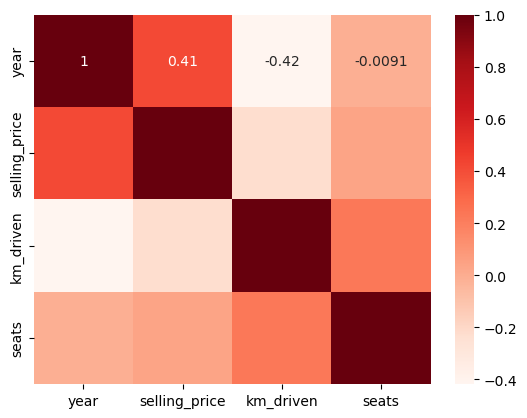

In [28]:
sns.heatmap(datos_numericos.corr(), annot=True, cmap='Reds')

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

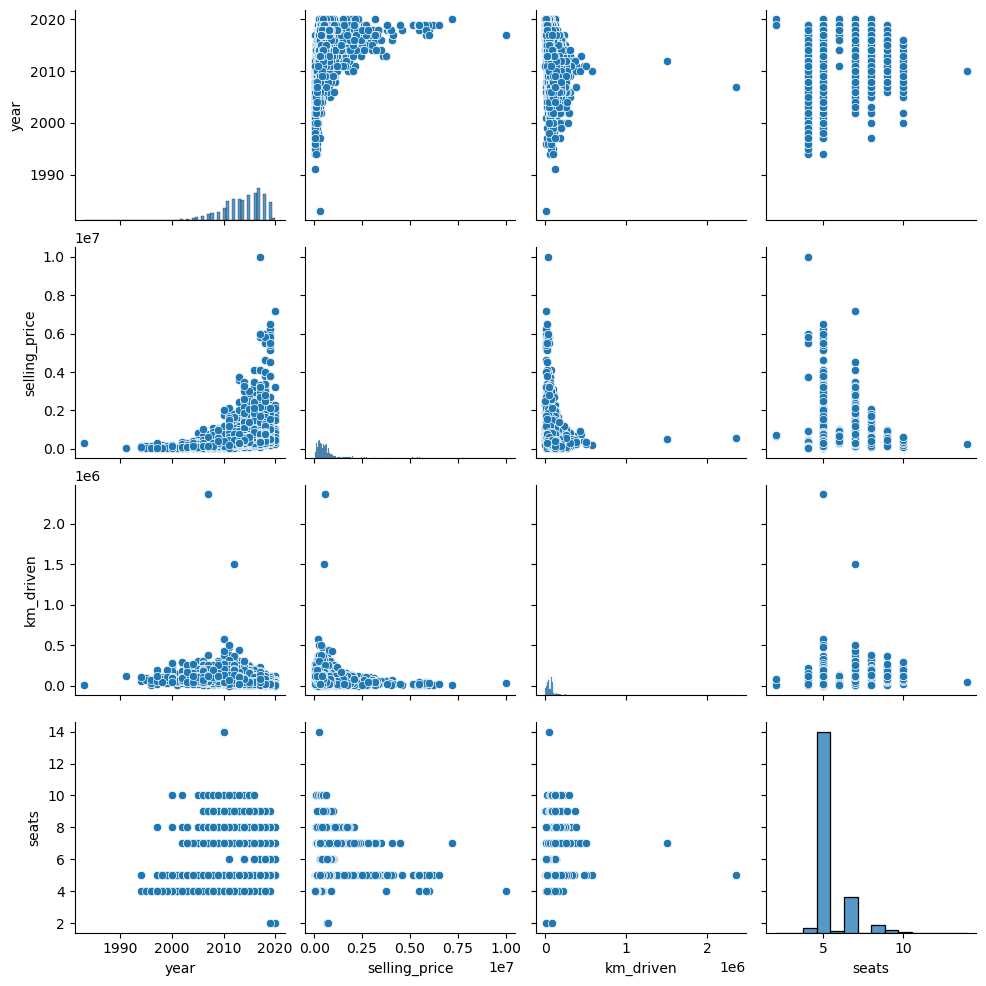

In [29]:
sns.pairplot(datos)

In [64]:
#Dividir el dataset en Train y Test
# Crear un conjunto de características X con solo datos numéricos
x = datos_numericos.drop('selling_price', axis=1)

# Crear una variable objetivo y con solo datos numéricos
y = datos_numericos['year']

In [31]:
print("x=",x.shape,"\ny=", y.shape)

x= (8128, 3) 
y= (8128,)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [33]:
x_train.shape

(5689, 3)

In [34]:
x_test.shape

(2439, 3)

In [35]:
model = LinearRegression()

In [40]:
from sklearn.impute import SimpleImputer

# Crear una instancia del imputador para reemplazar los valores NaN con la media
imputer = SimpleImputer(strategy='mean')

# Imputar los valores faltantes en los datos de entrenamiento
x_train_imputed = imputer.fit_transform(x_train)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo de regresión lineal con los datos imputados
model.fit(x_train_imputed, y_train)

LinearRegression()

In [46]:
model.coef_

array([1.00000000e+00, 2.37813755e-20, 1.36011734e-16])

In [47]:
#Entrenar el modelo
# Crear un DataFrame con los coeficientes del modelo
coeficientes_df = pd.DataFrame(model.coef_, index=x.columns, columns=['Coeficientes'])

In [48]:
print(coeficientes_df)

           Coeficientes
year       1.000000e+00
km_driven  2.378138e-20
seats      1.360117e-16


In [49]:
imputer = SimpleImputer(strategy='mean')

# Imputar los valores faltantes en los datos de prueba (si es necesario)
x_test_imputed = imputer.fit_transform(x_test)

# Realizar predicciones utilizando el modelo entrenado y los datos de prueba imputados
y_pred = model.predict(x_test_imputed)

In [50]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [51]:
MAE

9.322413917311687e-17

In [52]:
MSE

2.119671516382297e-29

In [53]:
datos['year'].mean()

2013.8040108267717

In [54]:
test_residual= y_test - y_pred

In [55]:
import hvplot.pandas

# Tracer el gráfico de densidad de kernel de los errores residuales
pd.DataFrame({'Error Values': test_residual}).hvplot.kde()

:Distribution   [Error Values]   (Density)

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


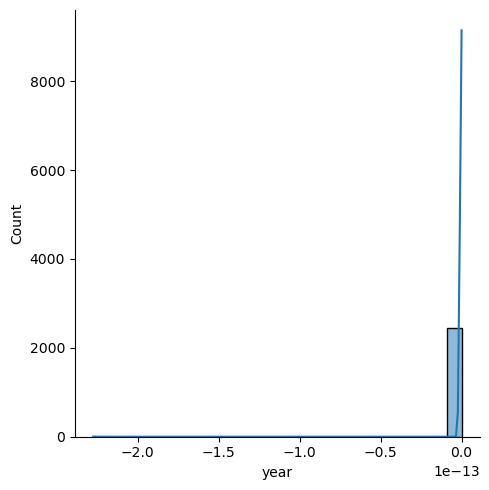

In [56]:
sns.displot(test_residual, bins=25, kde=True)

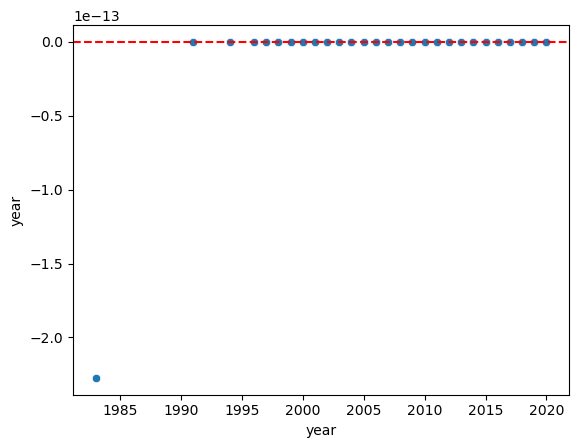

In [58]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

In [66]:
##La base de datos contiene una variedad de atributos que pueden influir en el precio de un automóvil, como el año de fabricación, el kilometraje, el tipo de combustible, la eficiencia de combustible.
##Con el analisis anterior se deduce lo siguiente, teniendo en cuenta que la base principal fue el año de fabricacion:

##Año de fabricación: El año de fabricación de un automóvil es un factor determinante en su precio. En general, los automóviles más nuevos tienden a tener precios más altos, ya que suelen ofrecer tecnología más avanzada, características de seguridad mejoradas y menor desgaste en comparación con vehículos más antiguos.
##Kilometraje recorrido: El kilometraje recorrido por un automóvil es otro factor crucial que influye en su precio. En términos generales, los automóviles con menor kilometraje suelen tener precios más altos, ya que implican un menor desgaste y una mayor vida útil restante. Los compradores tienden a preferir vehículos con menos kilometraje debido a su mayor fiabilidad y durabilidad.
##Tipo de combustible: El tipo de combustible que utiliza el automóvil también puede afectar su precio. Los vehículos que funcionan con combustibles más eficientes, como el diésel, suelen tener precios más altos debido a su mayor economía de combustible y menor costo de funcionamiento a largo plazo. Además, algunos compradores pueden preferir vehículos diésel por su mayor potencia y capacidad de remolque.
##Capacidad de asientos: La cantidad de asientos disponibles en un automóvil también puede influir en su precio. Los vehículos con mayor capacidad de asientos, como aquellos con cinco asientos o más, tienden a tener precios más altos debido a su mayor versatilidad y capacidad para transportar a más pasajeros. Esto puede ser especialmente valorado por familias o personas que requieren espacio adicional para pasajeros o carga.